# Introducción a Python para ciencias e ingenierías (notebook 5)


Ing. Martín Gaitán

- Twitter: `@tin_nqn_`
- Email: gaitan@gmail.com

- python.org.ar  (Python General -- Tod@s!)
- scipyla.org   (Python Científico - en portuñol/ingles)
--------

# ¡Bienvenidos a SymPy!

SymPy es una biblioteca Python para matemática simbólica, similar a software como Mathematica o Mathcad. La documentación se encuentra en http://sympy.org/ . 

En Anaconda (full) ya viene instalado, o se puede instalar via pip o conda (

       pip install sympy 
        

## ¿que es la computación simbólica?

Comunmente, las computadoras usan una [coma flotante](http://en.wikipedia.org/wiki/Floating_point) para **representar** numeros reales (y complejos) y calcular operaciones matemáticas. Esto implica que la precisión es limitada

In [1]:
import math
math.sqrt(9)

3.0

Esto es evidente con los numeros irracionales

In [2]:
math.sqrt(8)

2.8284271247461903

Los sistemas de cálculo simbólico (o álgebra computacional, CAS), utilizan una **representación simbólica** (presentada de la manera más simplicifada posible)

In [3]:
import sympy

raiz8 = sympy.sqrt(8)
raiz8

2*sqrt(2)

Podemos, por supuesto, **evaluar** la expresión simbólica

In [4]:
raiz8.evalf()

2.82842712474619

In [6]:
raiz8.evalf(n=150)

2.82842712474619009760337744841939615713934375075389614635335947598146495692421407770077506865528314547002769246182459404984967211170147442528824299420

Por defecto la evaluación numérica se lleva a cabo con un precisión de 15 decimales.
Pero puede ajustarse la precisión al número de decimales que uno desee, enviando el número de decimales como argumento a evalf() o a la función `N()`

SymPy utiliza como background la biblioteca [mpmath](http://code.google.com/p/mpmath/) que le permite realizar cálculos con aritmética de **precisión arbitraria**, de forma tal que ciertas constantes especiales, como pi, el número e, oo (infinito), son tratadas como símbolos y pueden ser evaluadas con aritmética de alta precisión:

### Configurando la salida

Para continuar, haremos que el "output matemático" se vea más bonito

In [9]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
sympy.sqrt(8)**sympy.pi

         π
⎛    ___⎞ 
⎝2⋅╲╱ 2 ⎠ 

Esa función inicializa el output en le mejor modo disponible en el entorno. Como los notebooks saben mostrar LaTex, lo hará así, mostrando *outputs* muy bonitos.

## Los primeros pasos: usar SymPy como una calculadora

SymPy tiene tres tipos de datos predefinidos: el real (Real), el racional (Rational) y el entero (Integer).
El tipo `Rational` representa a un número racional como un par de números enteros: el numerador y el denominador.
Por ejemplo: `Rational(1, 2)` representa la fracción $1/2$, `Rational(5, 3)` a $5/3$, etc.

In [19]:
a = Rational(1, 2)
a

In [20]:
a*2

In [10]:
sympy.pi**2

 2
π 

In [12]:
sympy.pi.evalf(n=200)

3.1415926535897932384626433832795028841971693993751058209749445923078164062862
089986280348253421170679821480865132823066470938446095505822317253594081284811
174502841027019385211055596446229489549303820

In [23]:
(pi+exp(1)).evalf()

También existe una clase para representar al infinito matemático, llamada oo:

In [21]:
sympy.oo > 99999

In [13]:
sympy.oo + 1

∞

In [28]:
sympy.N(sympy.sqrt(2), 100)

## Ejercicios:

1. Calcular 1/2 + 1/3 con aritmética racional.
2. Calcular $2^e$ con 200 decimales

In [14]:
Rational(1, 2) + Rational(1, 3)

5/6

## Símbolos

El alma del Cálculo Simbólico son, naturalmente, las variables simbólicas, que en SymPy son instancias de la clase `Symbol`. Una explicación intuitiva es que, mientras que las variables ordinarias tienen un valor que puede ser un número, una cadena, un valor verdadero / falso, una secuencia, etc. las variables simbólicas juegan el papel de "contenedores": no sabemos a priori lo que pueden ser

In [29]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')
n = sympy.Symbol('n', integer=True)

Luego, pueden ser manipuladas:

In [17]:
x + y + x - y

2⋅x

In [18]:
(x + y)**2

       2
(x + y) 

Una manera más compacta de definir variables simbólicas es con la función `symbols`, que permite pasar una cadena con muchas variables a generar. 

In [19]:
sympy.symbols('a b')

(a, b)

In [11]:
a, b = sympy.symbols('a b')
(a - b)**2

       2
(a - b) 

In [12]:
sympy.Symbol?

## Manipulación Algebráica

SymPy tiene una gran potencia para realizar cálculos en forma algebráica.

### Expansión

In [32]:
sympy.expand((x+y)**n, deep=True)

       n
(x + y) 

también se pueden hacer especificaciones adicionales:

In [14]:
sympy.expand(x + y, complex= True)

re(x) + re(y) + ⅈ⋅im(x) + ⅈ⋅im(y)

A veces es útil darle "pistas" al sistema para que sepa por qué "camino matemático" andar

In [33]:
sympy.expand(sympy.cos(x + y))

cos(x + y)

In [34]:
sympy.expand(sympy.cos(x + y), trig=True)

-sin(x)⋅sin(y) + cos(x)⋅cos(y)

### Simplificación

In [38]:
sympy.simplify(x**2 + 2*x*y + y**2)

 2            2
x  + 2⋅x⋅y + y 

La simplificación se realiza "de la mejor manera" que SymPy encuentra y a veces la respuesta puede no ser lo que uno espera (demasiado trivial o no en la forma que se necesita). Las pistas la estrategia de simplificación que debe utilizar:
    
* powsimp: simplifica exponentes.
* trigsimp: simplifica expresiones trigonométricas
* logcombine
* randsimp
* together

## Ejercicios:

1. Calcular la forma expandida de $(x+y)^6.$
2. Simplificar la expresión trigonométrica $\frac{sen(x)}{cos(x)}$

## Límites

Los límites se pueden calcular con mucha facilidad usando SymPy.
La sintaxis es: `limit(función, variable, punto)`
Entonces para calcular el límite de `f(x)` cuando `x` tiende a 0, debemos escribir:
    
    limit(f(x), x, 0)

In [39]:
from sympy import limit, sin, oo

limit(sin(x)/x, x, 0)

1

También se pueden calcular los límites cuando x tiende infinito:

In [41]:
limit(1/x, x, oo)

0

In [22]:
limit(x**x, x, 0)

1

### Ejercicio

Calcular el límite $\lim_{x \to +\infty}(1+\frac{1}{x})^x$

## Diferenciación

Se puede derivar cualquier expresión de Sympy utilizando:
`diff(función, variable)`


Por ejemplo:

In [50]:
from sympy import diff, tan, exp, cos

diff(sin(x)*cos(y), x, 2, y, 2)

sin(x)⋅cos(y)

In [48]:
diff?

In [44]:
diff(tan(x), x)

   2       
tan (x) + 1

In [45]:
diff(exp(sin(x**3)**x), x)

⎛   3    ⎛ 3⎞               ⎞     x⎛ 3⎞         
⎜3⋅x ⋅cos⎝x ⎠      ⎛   ⎛ 3⎞⎞⎟  sin ⎝x ⎠    x⎛ 3⎞
⎜──────────── + log⎝sin⎝x ⎠⎠⎟⋅ℯ        ⋅sin ⎝x ⎠
⎜     ⎛ 3⎞                  ⎟                   
⎝  sin⎝x ⎠                  ⎠                   

Se pueden calcular derivadas de orden superior especificando el orden de derivación como tercer argumento de diff: 

In [33]:
diff(sin(2*x), x, 1)

2⋅cos(2⋅x)

In [34]:
diff(sin(2*x), x, 2)

-4⋅sin(2⋅x)

In [35]:
diff(sin(2*x), x, 3)

-8⋅cos(2⋅x)

## Expansión en serie de Taylor

SymPy puede expandir funciones en serie de Taylor mediante la función:

In [52]:
from sympy import series, cos
series(cos(x), x)

     2    4        
    x    x     ⎛ 6⎞
1 - ── + ── + O⎝x ⎠
    2    24        

In [53]:
series(1/cos(x), x)

     2      4        
    x    5⋅x     ⎛ 6⎞
1 + ── + ──── + O⎝x ⎠
    2     24         

## Ejercicios:

1. Calcular el límite de $$\lim_{x \to 0} sen(x)\frac{exp(cos(x)^x)}{x}$$

In [57]:

sympy.latex(sin(x)*exp(cos(x)**x)/x)

'\\frac{1}{x} e^{\\cos^{x}{\\left (x \\right )}} \\sin{\\left (x \\right )}'

II. Calcular las tres primeras derivadas de $$log{ (x^{2} - tan{(x)})}$$

In [55]:
sympy.latex?

## Integración

SymPy es capaz de calcular integrales definidas e indefinidas para funciones elementales, trascendentes y especiales, mediante la herramienta integrate().

Integración de funciones elementales:

In [61]:
from sympy import integrate, log
integrate(6*x**5, x)

 6
x 

In [59]:
integrate(sin(x), x)

-cos(x)

In [62]:
integrate(log(x), x)

x⋅log(x) - x

In [63]:
from sympy import sinh
integrate(2*x + sinh(x), x)

 2          
x  + cosh(x)

Integración de funciones especiales:

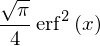

In [43]:
integrate(exp(-x**2)*erf(x), x)

También es posible calcular integrales definidas. La función es la misma: integrate(función, (varialble, límite inferior, límite superior)), sólo que como segundo argumento se utiliza una tupla cuyo primer elemento es la variable de integración, su segundo elemento es el límtie inferior de integración y el último es el límite superior.

### Ejemplos:

In [44]:
integrate(x**3, (x, -1, 1))

In [45]:
integrate(sin(x), (x, 0, pi/2))


In [46]:
integrate(cos(x), (x, -pi/2, pi/2))

¡Incluso se puden calcular integrales impropias!

In [47]:
integrate(exp(-x), (x, 0, oo))

In [48]:
integrate(exp(-x**2), (x, -oo, oo))

## Resolución de ecuaciones

SymPy es capaz de resolver ecuaciones algebráicas de una y de varias variables

Para eso existe la función `solve(ecuación, variable)`, donde ecuación es una expresión que es igual a cero.

Por ejemplo, para resolver la ecuación $x^4 - 1 = 0$

In [65]:
sympy.solve(x**4 - 1, x)

[-1, 1, -ⅈ, ⅈ]

También se pueden resolver sistemas de ecuaciones en varias variables. Ahora el primer argumento de solve es una lista cuyos elementos son las ecuaciones a resolver, y el segundo argumento es otra lista formada por las variables o incógnitas del sistema. Por ejemplo:

In [67]:
sympy.solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y])

{x: -3, y: 1}

In [68]:
sympy.solve?

Puede resolver ecuaciones en las que intervengan funciones trascendentes, pero su capacidad es limitada y, a veces, no encuentra la solución.

In [51]:
solve(exp(x) + 1, x)

Es posible factorizar polinomios en términos de factores irreducibles con la función `factor(función)`:

In [50]:
from sympy import factor
f = x**4 - 3*x**2 + 1
factor(f)

⎛ 2        ⎞ ⎛ 2        ⎞
⎝x  - x - 1⎠⋅⎝x  + x - 1⎠

In [52]:
factor?

## Álgebra Lineal

## Matrices

Las matrices se crean como instancias de la clase Matrix:

In [69]:
from sympy import Matrix, Symbol
Matrix([[1,0], [0,1]])

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

A diferencia de los *arrays* de NumPy, los de SymPy pueden contener símbolos:

In [70]:
x= Symbol('x')
y= Symbol('y')
A = Matrix([[1,x], [y,1]])
A

⎡1  x⎤
⎢    ⎥
⎣y  1⎦

In [72]:
A.inv()

⎡  x⋅y           -x    ⎤
⎢──────── + 1  ────────⎥
⎢-x⋅y + 1      -x⋅y + 1⎥
⎢                      ⎥
⎢    -y           1    ⎥
⎢  ────────    ────────⎥
⎣  -x⋅y + 1    -x⋅y + 1⎦

## Ecuaciones diferenciales

In [75]:
g = Symbol('g')
g(x).diff(x, x) + g(x)

         2      
        d       
g(x) + ───(g(x))
         2      
       dx       

In [76]:
sympy.dsolve(g(x).diff(x, x) + g(x), g(x))

g(x) = C₁⋅sin(x) + C₂⋅cos(x)

Si uno quiere la ecuación diferencial sea resuelta de un modo en particular, puede incluir "pistas" como segundo argumento de dsolve para guiarlo en la resolución:

In [78]:
expres = sin(x)*cos(g(x)) + cos(x)*sin(g(x))*g(x).diff(x)

In [80]:
sympy.dsolve(expres, g(x), hint='separable')

⎡             ⎛     _____________⎞                 ⎛     _____________⎞       
⎢             ⎜    ╱    C₁       ⎟                 ⎜    ╱    C₁       ⎟       
⎢g(x) = - asin⎜   ╱  ─────── + 1 ⎟ + π, g(x) = asin⎜   ╱  ─────── + 1 ⎟ + π, g
⎢             ⎜  ╱      2        ⎟                 ⎜  ╱      2        ⎟       
⎣             ⎝╲╱    cos (x)     ⎠                 ⎝╲╱    cos (x)     ⎠       

           ⎛     _____________⎞             ⎛     _____________⎞⎤
           ⎜    ╱    C₁       ⎟             ⎜    ╱    C₁       ⎟⎥
(x) = -asin⎜   ╱  ─────── + 1 ⎟, g(x) = asin⎜   ╱  ─────── + 1 ⎟⎥
           ⎜  ╱      2        ⎟             ⎜  ╱      2        ⎟⎥
           ⎝╲╱    cos (x)     ⎠             ⎝╲╱    cos (x)     ⎠⎦

# Numpy: la yapa


In [81]:
import numpy as np

In [82]:
x = np.array([1, 2., 3.])
y = np.array([.3, -5, 10])

Ya sabemos que las operaciones se difunden, y por ello el "casting" booleano no es válido.  

In [84]:
bool(x >= 2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [86]:
np.

True

**Cada elemento** de `(y > x)` es booleano, pero todo `x` no es ni verdadero ni falso. 

In [92]:
bool(a >= 2)

False

Ahora supongamos que tenemos esta función

In [87]:
def func1(a):
    return a ** 2

print(func1(10.3))
print(func1(3.4 + 1j))
print(func1(x))

106.09000000000002
(10.559999999999999+6.8j)
[ 1.  4.  9.]


In [88]:
def myfunc(a, b):
     """Return a-b if a>b, otherwise return a+b"""
     if bool(a > b):
         return a - b
     else:
        return a + b

In [89]:
myfunc(3, 2)

1

Obvio. Pero si un argumento es un array, estaremos en el caso de arriba

In [90]:
myfunc(x, y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Lo que necesitamos es **vectorizar la función**. `vectorize` transforma una función cualquiera a la magia de numpy: esto es, cuando un parametro es un array, automaticamente se realiza una iteración implicita, elemento a elemento. 

In [92]:
vmyfunc = np.vectorize(myfunc)
vmyfunc(x, 2)    # para cada elemento de x, aplica myfunc

array([ 3.,  4.,  1.])

Y sigue funcionando para escalares

In [93]:
x > y

array([ True,  True, False], dtype=bool)

In [107]:
vmyfunc??